In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 11s 0us/step


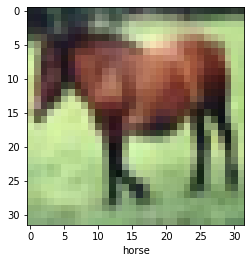

In [3]:
IMG_INDEX = 7

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [10]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
history = model.fit(train_images, train_labels, epochs=4,validation_data=(test_images, test_labels))

Epoch 1/4
1563/1563 [==============================] - 69s 44ms/step - loss: 1.5500 - accuracy: 0.4328 - val_loss: 1.3002 - val_accuracy: 0.5358
Epoch 2/4
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1746 - accuracy: 0.5871 - val_loss: 1.1347 - val_accuracy: 0.6080
Epoch 3/4
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0249 - accuracy: 0.6405 - val_loss: 1.0018 - val_accuracy: 0.6460
Epoch 4/4
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9271 - accuracy: 0.6767 - val_loss: 0.9321 - val_accuracy: 0.6668


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('accuracy', test_acc)

313/313 - 4s - loss: 0.9321 - accuracy: 0.6668
accuracy 0.6668000221252441


In [13]:
#accuracy of 67% is fairly low. one consideration would be for application of data augmentation to improve accuracy

In [15]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [16]:
# creates a data generator object that transforms images
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.20,
                             height_shift_range=0.20,
                             shear_range=0.20,
                             zoom_range=0.20,horizontal_flip=True,
                             fill_mode='nearest')

In [17]:
#pick image to transform
test_img = test_images[20]
img = image.img_to_array(test_img)
img= img.reshape((1,)+ img.shape)

i =0

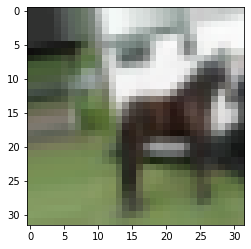

In [20]:
for batch in datagen.flow(img,save_prefix='test',save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i>4:
    break

plt.show()
